# Test với hình ảnh được tải lên từ hệ thống cục bộ

In [1]:
# Kết nối driver với gg colab
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# import thư viện
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
import io
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files


In [3]:
# load model từ file .h5 đã lưu
file_path = '/content/drive/MyDrive/Colab Notebooks/VGG16_35epoch.h5'
model = keras.models.load_model(file_path)

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
vi_class_names = ["Áo thun", "Quần dài", "Áo len", "Đầm", "Áo khoác",
               "Sandal", "Áo sơ mi", "Giày thể thao", "Túi xách", "Ủng"]

import pandas as pd
data = {"English Names": class_names, "Vietnamese Names": vi_class_names}
df = pd.DataFrame(data)
df

,English Names,Vietnamese Names
0,T-shirt/top,Áo thun
1,Trouser,Quần dài
2,Pullover,Áo len
3,Dress,Đầm
4,Coat,Áo khoác
5,Sandal,Sandal
6,Shirt,Áo sơ mi
7,Sneaker,Giày thể thao
8,Bag,Túi xách
9,Ankle boot,Ủng


In [ ]:
from google.colab.patches import cv2_imshow


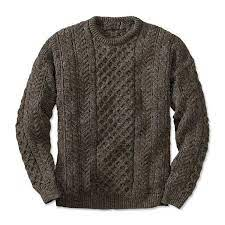

1/1 [==============================] - 9s 9s/step
Túi xách


In [ ]:
path_file= "/content/drive/MyDrive/aolen.jpg"
image = cv2.imread(path_file)
cv2_imshow(image)

image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
image = cv2.resize(image,(28,28))

image = image/255
# image = cv2.resize(image, dsize=(32, 32))
image = image.reshape( 28, 28, 1)
image=np.array([image])
# print(image)

pre = model.predict(image)
prediction=np.argmax(pre,axis=1)
print(vi_class_names[prediction[0]])
# image

# test nhiều ảnh


In [14]:
# Tải ảnh lên
uploads=files.upload()

images_bytes = list(uploads.values())  


Saving black_50450450839-sole__8__f5275102abc74b11b66301655ee415eb_master.webp to black_50450450839-sole__8__f5275102abc74b11b66301655ee415eb_master (2).webp
Saving 3000.webp to 3000.webp


1/1 [==============================] - 0s 51ms/step


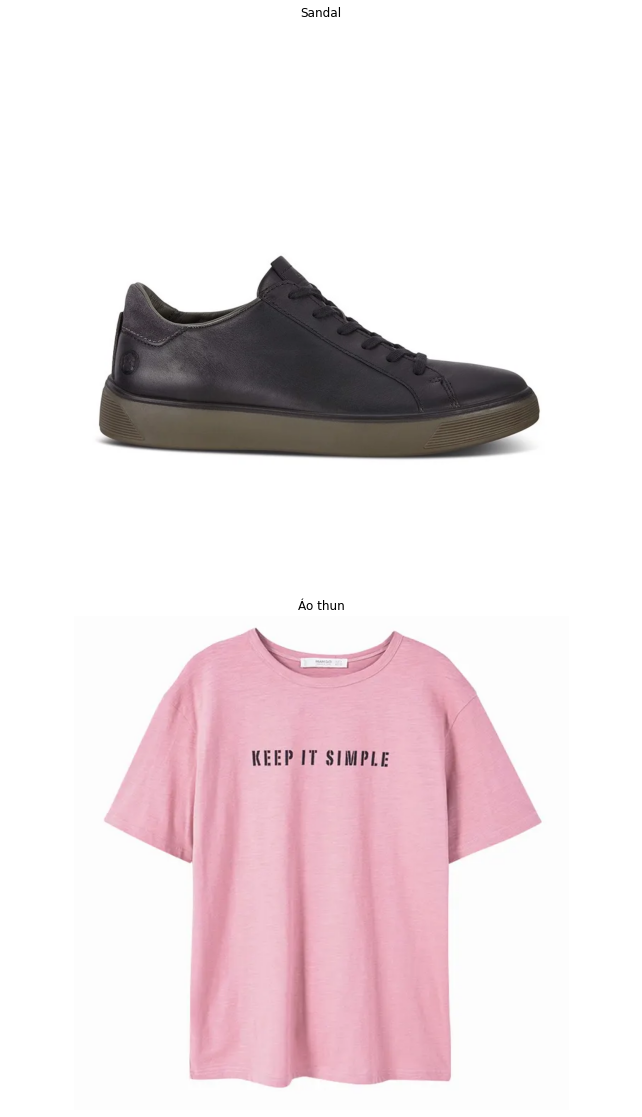

In [15]:
num_rows = len(images_bytes)

fig, axs = plt.subplots(nrows=num_rows, ncols=1, figsize=(20, 20))

for i, image_bytes in enumerate(images_bytes):
    img = Image.open(io.BytesIO(image_bytes))

    np_img = np.array(img)
    axs[i].imshow(np_img)
    axs[i].axis('off')
    
    # Chuẩn hóa hình ảnh về dạng (28,28,1)

    # chuyển sang đen trắng 
    np_img = cv2.cvtColor(np_img, cv2.COLOR_RGB2GRAY)

    # resize sang (28, 28)
    np_img = cv2.resize(np_img,(28,28))
    # print(np_img.shape)

    # Chuẩn hóa picel hình ảnh về từ 0 đến 1

    np_img = 1 - np_img/255
    
    # axs[i].imshow(np_img, cmap=plt.cm.binary)

    # resize sang (28, 28, 1)
    np_img = np.expand_dims(np_img, 2)
    # print(np_img.shape)

    # resize sang (1, 28, 28, 1)
    np_img = tf.expand_dims(np_img, 0)
    # print(np_img.shape)


    pre = model.predict(np_img)
    prediction=np.argmax(pre,axis=1)
    # print(vi_class_names[prediction[0]])
    axs[i].set_title(vi_class_names[prediction[0]])

# plt.subplots_adjust(wspace=0.05, hspace=0.05)

plt.show()